In [5]:
from Player import *
from State import *
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm

### Classic 

In [2]:
p1 = RandomClassicPlayer('p1')
p2 = RandomClassicPlayer('p2')

st = ClassicState(p1, p2)

st.play(1000)

P1 method: 'sarsa', P2 method 'sarsa'
Epochs: 50, Total Training Games: 25000, Games per Epoch: 500
Eval Games per iteration: 100


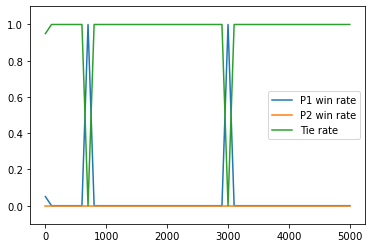

P1 method: 'sarsa', P2 method 'Random Player'
Epochs: 50, Total Training Games: 25000, Games per Epoch: 500
Eval Games per iteration: 100


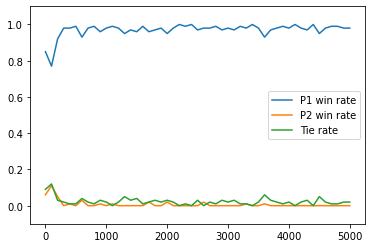

P1 method: 'expected_sarsa', P2 method 'sarsa'
Epochs: 50, Total Training Games: 25000, Games per Epoch: 500
Eval Games per iteration: 100


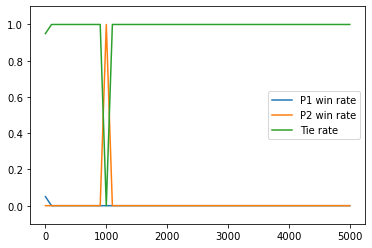

P1 method: 'expected_sarsa', P2 method 'Random Player'
Epochs: 50, Total Training Games: 25000, Games per Epoch: 500
Eval Games per iteration: 100


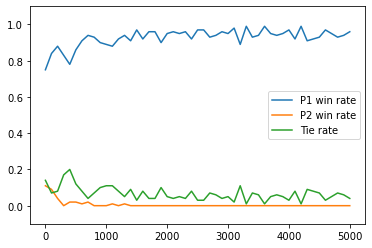

P1 method: 'Random Player', P2 method 'sarsa'
Epochs: 50, Total Training Games: 25000, Games per Epoch: 500
Eval Games per iteration: 100


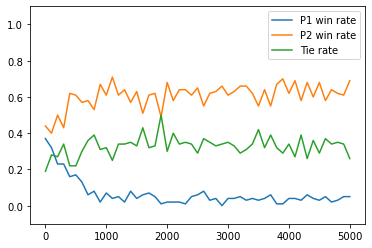

P1 method: 'Random Player', P2 method 'Random Player'
Epochs: 50, Total Training Games: 25000, Games per Epoch: 500
Eval Games per iteration: 100


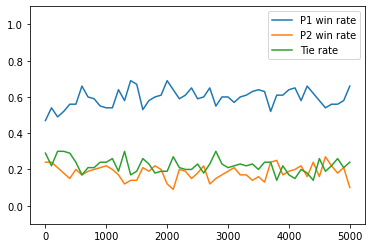

In [7]:
iterations = 50
train_games_per_iteration = 500
eval_games_per_iteration = 100
verbose = False
visualize = True
start_from_0 = True

P1 = [ClassicPlayer("p1", update_method='sarsa'), ClassicPlayer("p1", update_method='expected_sarsa'), RandomClassicPlayer("p1")] # Player("p1", update_method='expected_sarsa')
P2 = [ClassicPlayer("p2", update_method='sarsa'), RandomClassicPlayer("p2")] # Player("p1", update_method='expected_sarsa')

for p1 in P1:
    for p2 in P2:
        st = ClassicState(p1, p2, lose_reward=-1)
        p1_win_rate = []
        p2_win_rate = []
        tie_rate = []
        p1.states_value = {}
        p2.states_value = {}
        if start_from_0:
            # Eval
            p1.exp_rate = 0
            p2.exp_rate = 0
            st.reset_metrics()
            st.play(eval_games_per_iteration)
            p1_win_rate.append(st.p1_wins/st.games)
            p2_win_rate.append(st.p2_wins/st.games)
            tie_rate.append(st.tie/st.games)
            
        for i in range(iterations):
            # Eval
            p1.exp_rate = 0
            p2.exp_rate = 0
            p1.is_eval = True
            p2.is_eval = True
            st.reset_metrics()
            st.play(eval_games_per_iteration)
            p1_win_rate.append(st.p1_wins/st.games)
            p2_win_rate.append(st.p2_wins/st.games)
            tie_rate.append(st.tie/st.games)
            if verbose:
                print("________________________________")
                print("P1 method: '{}', P2 method '{}'".format(p1.update_method, p2.update_method))
                print("Training Iteration: {}, Train Games: {}, Eval Games: {}".format(i+1, (i+1)*train_games_per_iteration, eval_games_per_iteration))
                print("\tP1 win\tP2 win\tTie")
                print('Win\t{}\t{}\t{}'.format(p1_win_rate[-1], p2_win_rate[-1], tie_rate[-1]))
                
            # Train (After Eval now)
            p1.exp_rate = 0.3
            p2.exp_rate = 0.3
            p1.is_eval = False
            p2.is_eval = False
            st.reset_metrics()
            st.play(train_games_per_iteration)
            
        if visualize:
            if start_from_0:
                games = np.arange(0, (iterations+1)*eval_games_per_iteration, eval_games_per_iteration)
            else:
                games = np.arange(eval_games_per_iteration, (iterations+1)*eval_games_per_iteration, eval_games_per_iteration)
            print("P1 method: '{}', P2 method '{}'".format(p1.update_method, p2.update_method))
            print("Epochs: {}, Total Training Games: {}, Games per Epoch: {}".format(iterations, iterations*train_games_per_iteration, train_games_per_iteration))
            print("Eval Games per iteration: {}".format(eval_games_per_iteration))
#             axes, fig = 
            p1_plot = plt.plot(games, p1_win_rate, label="P1 win rate")
            p2_plot = plt.plot(games, p2_win_rate, label="P2 win rate")
            tie_plot = plt.plot(games, tie_rate, label="Tie rate")
            plt.ylim(-0.1,1.1)
            plt.legend()
            plt.show()

### Superposition

In [4]:
from Player import *
from State import *
from collections import Counter
import matplotlib.pyplot as plt

p1 = SPPlayer('p1')
p2 = SPPlayer('p2')

st = SPState(p1, p2)

st.play(100)

100%|██████████| 150/150 [21:49<00:00,  8.73s/it]   

P1 method: 'sarsa', P2 method 'sarsa'
Epochs: 150, Total Training Games: 30000, Games per Epoch: 200
Eval Games per iteration: 100


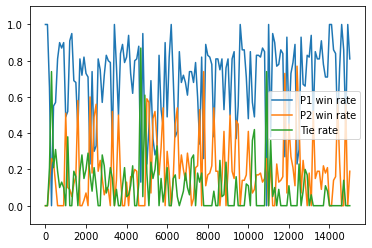

100%|██████████| 150/150 [09:28<00:00,  3.79s/it]

P1 method: 'sarsa', P2 method 'Random Player'
Epochs: 150, Total Training Games: 30000, Games per Epoch: 200
Eval Games per iteration: 100


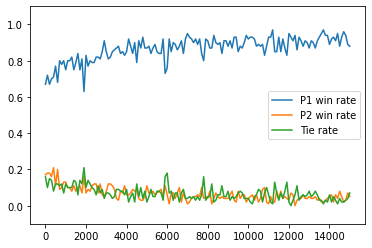

100%|██████████| 150/150 [06:09<00:00,  2.47s/it]

P1 method: 'Random Player', P2 method 'sarsa'
Epochs: 150, Total Training Games: 30000, Games per Epoch: 200
Eval Games per iteration: 100


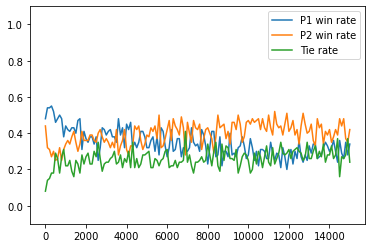

100%|██████████| 150/150 [01:08<00:00,  2.20it/s]

P1 method: 'Random Player', P2 method 'Random Player'
Epochs: 150, Total Training Games: 30000, Games per Epoch: 200
Eval Games per iteration: 100


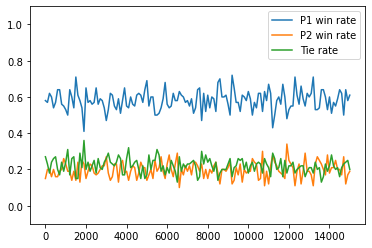

CPU times: user 30min 40s, sys: 1min 35s, total: 32min 15s
Wall time: 38min 42s


In [13]:
%%time
iterations = 150
train_games_per_iteration = 200
eval_games_per_iteration = 100
verbose = False
visualize = True
start_from_0 = True

P1 = [SPPlayer("p1", update_method='sarsa'), RandomSPPlayer("p1")] # Player("p1", update_method='expected_sarsa')
P2 = [SPPlayer("p2", update_method='sarsa'), RandomSPPlayer("p2")] # Player("p1", update_method='expected_sarsa')

for p1 in P1:
    for p2 in P2:
        st = SPState(p1, p2)
        p1_win_rate = []
        p2_win_rate = []
        tie_rate = []
        p1.states_value = {}
        p2.states_value = {}
        p1.forget()
        p2.forget()
        if start_from_0:
            # Eval
            p1.exp_rate = 0
            p2.exp_rate = 0
            st.reset_metrics()
            st.play(eval_games_per_iteration)
            p1_win_rate.append(st.p1_wins/st.games)
            p2_win_rate.append(st.p2_wins/st.games)
            tie_rate.append(st.tie/st.games)
            
        for i in tqdm(range(iterations)):
            # Eval
            p1.exp_rate = 0
            p2.exp_rate = 0
            p1.is_eval = True
            p2.is_eval = True
            st.reset_metrics()
            st.play(eval_games_per_iteration)
            p1_win_rate.append(st.p1_wins/st.games)
            p2_win_rate.append(st.p2_wins/st.games)
            tie_rate.append(st.tie/st.games)
            if verbose:
                print("________________________________")
                print("P1 method: '{}', P2 method '{}'".format(p1.update_method, p2.update_method))
                print("Training Iteration: {}, Train Games: {}, Eval Games: {}".format(i+1, (i+1)*train_games_per_iteration, eval_games_per_iteration))
                print("\tP1 win\tP2 win\tTie")
                print('Win\t{}\t{}\t{}'.format(p1_win_rate[-1], p2_win_rate[-1], tie_rate[-1]))
                
            # Train (After Eval now)
            p1.exp_rate = 0.3
            p2.exp_rate = 0.3
            p1.is_eval = False
            p2.is_eval = False
            st.reset_metrics()
            st.play(train_games_per_iteration)
            
        if visualize:
            if start_from_0:
                games = np.arange(0, (iterations+1)*eval_games_per_iteration, eval_games_per_iteration)
            else:
                games = np.arange(eval_games_per_iteration, (iterations+1)*eval_games_per_iteration, eval_games_per_iteration)
            print("P1 method: '{}', P2 method '{}'".format(p1.update_method, p2.update_method))
            print("Epochs: {}, Total Training Games: {}, Games per Epoch: {}".format(iterations, iterations*train_games_per_iteration, train_games_per_iteration))
            print("Eval Games per iteration: {}".format(eval_games_per_iteration))
#             axes, fig = 
            p1_plot = plt.plot(games, p1_win_rate, label="P1 win rate")
            p2_plot = plt.plot(games, p2_win_rate, label="P2 win rate")
            tie_plot = plt.plot(games, tie_rate, label="Tie rate")
            plt.ylim(-0.1,1.1)
            plt.legend()
            plt.show()

### Quantum

In [4]:
from Player import *
from State import *
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from Player import *
from State import *
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm
from model import *
from League import *

In [2]:
p1 = DeepQPlayer('p1',model_cls=Model2)
p2 = DeepQPlayer('p2')

st = QState(p1, p2)

st.play(10)

Round 0
Round 1
Round 2

 {'Challenger': [[10, 10, 10], [5, 5, 5], [5, 5, 5]], 'Contender': [[5, 5, 5], [15, 15, 15], [0, 0, 0]], 'Underdog': [[10, 10, 10], [5, 5, 5], [5, 5, 5]]}


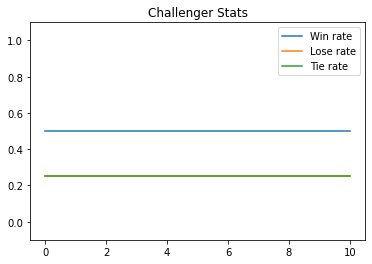

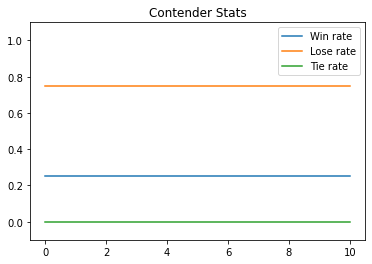

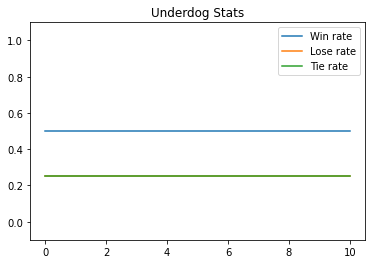


 {'Challenger': [[0.5, 0.5, 0.5], [0.25, 0.25, 0.25], [0.25, 0.25, 0.25]], 'Contender': [[0.25, 0.25, 0.25], [0.75, 0.75, 0.75], [0.0, 0.0, 0.0]], 'Underdog': [[0.5, 0.5, 0.5], [0.25, 0.25, 0.25], [0.25, 0.25, 0.25]]}


In [5]:
if __name__ == "__main__":
    # player_list = [RandomQPlayer("Challenger_v1_"), DeepQPlayer("Contender")]
    # test_league = League(player_list, learning_games_per_round=10, games_per_round=5)

    # print("Test play_match_up()")
    # state = test_league.states[0]
    # st = test_league.play_match_up(state)
    # print("p1 wins:",st.p1_wins)
    # print("p2 wins:",st.p2_wins)
    # print("ties:", st.tie)

    # print("\nTest for_player()")
    # new_player = test_league.fork_player(player_list[1])
    # print(new_player.name)
    # print("States values the same (should be True):", new_player.states_value==player_list[1].states_value)
    # print("Identical model weights (should be True):",(next(player_list[1].model.parameters())==next(new_player.model.parameters())).all().item())
    # print("Referencing same object (should be False):", player_list[1].model is new_player.model)

    # player_list = [RandomQPlayer("Challenger_v1_"), DeepQPlayer("Contender"), DeepQPlayer("Champion"), DeepQPlayer("Underdog")]
    # test_league = League(player_list, learning_games_per_round=10, games_per_round=5, warm_up=10)

    # print("\nLeague States")
    # print(test_league.states)

    # print("\nWarm up players", end="")
    # test_league.warmup()
    # print(" - Complete")

    # print("\nCreate and Play Rounds")
    # print("Round 1 results:")
    # round_result = test_league.play_round(random_train=True)
    # print(round_result)
    # print("\nResults after 2 rounds:")
    # round_result = test_league.play_round()
    # print(test_league.round_stats)

    player_list = [DeepQPlayer("Challenger"), DeepQPlayer("Contender"), DeepQPlayer("Underdog")]
    n_players = len(player_list)
    learning_games_per_iteration = 10
    eval_games_per_iteration = 5
    n_rounds = 3
    warmup_games = 10
    verbose = True
    warmup = False


    league = League(player_list, learning_games_per_round=learning_games_per_iteration, games_per_round=eval_games_per_iteration, warm_up=warmup_games)
    
    # NOTE: can use this for warm up
    if warmup:
        league.warmup()

    # {name: [[round_1_win, ...]
    #         [round_1_lose, ...] 
    #         [round_1_tie, ...]], ...}
    plot_stats = {}

    # play rounds of games
    for i in range(n_rounds):
        round_results = league.play_round()
        print("Round {}".format(i))
        # print(round_results)
        for match_up in round_results['stats'].keys():
            names = round_results['matchups'][match_up].split(' vs ')
            p1_name = names[0]
            p2_name = names[1]

            # Player 1 stats
            wins = round_results['stats'][match_up][1]
            lose = round_results['stats'][match_up][2]
            tie = round_results['stats'][match_up][0]
            # if not there
            if p1_name not in plot_stats:
                plot_stats[p1_name] = [[wins],[lose],[tie]]
            # if there
            else:
                # if round stats already initialized
                if len(plot_stats[p1_name][0]) == i+1:
                    plot_stats[p1_name][0][i] += wins
                    plot_stats[p1_name][1][i] += lose
                    plot_stats[p1_name][2][i] += tie
                # if round not initialized start column
                else:
                    plot_stats[p1_name][0].append(wins)
                    plot_stats[p1_name][1].append(lose)
                    plot_stats[p1_name][2].append(tie)                    

            # Player 2 stats
            wins = round_results['stats'][match_up][2]
            lose = round_results['stats'][match_up][1]
            tie = round_results['stats'][match_up][0]
            # if not there
            if p2_name not in plot_stats:
                plot_stats[p2_name] = [[wins],[lose],[tie]]
            # if there
            else:
                # if round stats already initialized
                if len(plot_stats[p2_name][0]) == i+1:
                    plot_stats[p2_name][0][i] += wins
                    plot_stats[p2_name][1][i] += lose
                    plot_stats[p2_name][2][i] += tie
                # if round not initialized start column
                else:
                    plot_stats[p2_name][0].append(wins)
                    plot_stats[p2_name][1].append(lose)
                    plot_stats[p2_name][2].append(tie)
    
    if verbose:
        print("\n", plot_stats)
    
    for player in plot_stats.keys():
        games = np.arange(0, (n_rounds)*eval_games_per_iteration, eval_games_per_iteration)
        
        for i in range(n_rounds):
            plot_stats[player][0][i] /= eval_games_per_iteration*((n_players-1)*2)
            plot_stats[player][1][i] /= eval_games_per_iteration*((n_players-1)*2)
            plot_stats[player][2][i] /= eval_games_per_iteration*((n_players-1)*2)

        p1_plot = plt.plot(games, plot_stats[player][0], label="Win rate")
        p2_plot = plt.plot(games, plot_stats[player][1], label="Lose rate")
        tie_plot = plt.plot(games, plot_stats[player][2], label="Tie rate")
        plt.ylim(-0.1,1.1)
        plt.title("{} Stats".format(player))
        plt.legend()
        plt.show()
    
    if verbose:
        print("\n", plot_stats)


    # get aggregate data of player
    # for r in league.round_stats.keys():
    #     print(league.round_stats[r]['stats'])

### Playing First

In [ ]:
%%time
from Player import *
from State import *
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm
from model import *

iterations = 30
train_games_per_iteration = 200
eval_games_per_iteration = 100
verbose = False
visualize = True
start_from_0 = True

P1 = [RandomQPlayer('p1'), DeepQPlayer("p1", model_cls=Model2), QPlayer("p1"), DeepQPlayer("p1", model_cls=LinearModel)] # Player("p1", update_method='expected_sarsa')
# P1 = [dp, RandomQPlayer('p1'), DeepQPlayer("p1", model_cls=Model2)]
# P1 = [QPlayer("p1")]
P2 = [RandomQPlayer("p2")] # Player("p1", update_method='expected_sarsa')

for p1 in P1:
    for p2 in P2:
        st = QState(p1, p2)
        st2 = QState(p2, p1)
        p1_win_rate = []
        p2_win_rate = []
        tie_rate = []
        p1.states_value = {}
        p2.states_value = {}
#         p1.forget()
#         p2.forget()
#         if start_from_0:
#             # Eval
#             st.reset_metrics()
#             st.play(eval_games_per_iteration // 2)
#             p1_win_rate.append(st.p1_wins/st.games)
#             p2_win_rate.append(st.p2_wins/st.games)
#             tie_rate.append(st.tie/st.games)
            
#             p2.exp_rate = 0
#             st2.reset_metrics()
#             st2.play(eval_games_per_iteration // 2)
#             p1_win_rate.append((st.p1_wins + st2.p2_wins)/(st.games + st2.games))
#             p2_win_rate.append((st.p2_wins + st2.p1_wins)/(st.games + st2.games))
#             tie_rate.append((st.tie + st2.tie)/(st.games + st2.games))
            
        for i in tqdm(range(iterations)):
            # Eval
            p1.exp_rate = 0
            p2.exp_rate = 0
            p1.is_eval = True
            p2.is_eval = True
            
            st.reset_metrics()
            st.play(eval_games_per_iteration // 2)
#             p1_win_rate.append(st.p1_wins/st.games)
#             p2_win_rate.append(st.p2_wins/st.games)
#             tie_rate.append(st.tie/st.games)
            
            st2.reset_metrics()
            st2.play(eval_games_per_iteration // 2)
            p1_win_rate.append((st.p1_wins + st2.p2_wins)/(st.games + st2.games))
            p2_win_rate.append((st2.p1_wins + st.p2_wins)/(st.games + st2.games))
            tie_rate.append((st.tie + st2.tie)/(st.games + st2.games))
            if verbose:
                print("________________________________")
                print("P1 method: '{}', P2 method '{}'".format(p1.update_method, p2.update_method))
                print("Training Iteration: {}, Train Games: {}, Eval Games: {}".format(i+1, (i+1)*train_games_per_iteration, eval_games_per_iteration))
                print("\tP1 win\tP2 win\tTie")
                print('Win\t{}\t{}\t{}'.format(p1_win_rate[-1], p2_win_rate[-1], tie_rate[-1]))
                
            # Train (After Eval now)
            p1.exp_rate = 0.3
            p2.exp_rate = 0.3
            p1.is_eval = False
            p2.is_eval = False
            st.reset_metrics()
            st2.reset_metrics()
            st.play(train_games_per_iteration)
            st2.play(train_games_per_iteration)
            
        if visualize:
            if start_from_0:
                games = np.arange(0, (iterations)*eval_games_per_iteration, eval_games_per_iteration)
            else:
                games = np.arange(eval_games_per_iteration, (iterations)*eval_games_per_iteration, eval_games_per_iteration)
            print("P1 method: '{}', P2 method '{}'".format(p1.update_method, p2.update_method))
            print("Epochs: {}, Total Training Games: {}, Games per Epoch: {}".format(iterations, iterations*train_games_per_iteration, train_games_per_iteration))
            print("Eval Games per iteration: {}".format(eval_games_per_iteration))
#             axes, fig = 
            p1_plot = plt.plot(games, p1_win_rate, label="P1 win rate")
            p2_plot = plt.plot(games, p2_win_rate, label="P2 win rate")
            tie_plot = plt.plot(games, tie_rate, label="Tie rate")
            plt.ylim(-0.1,1.1)
            plt.legend()
            plt.show()

### Playing both first and second

In [ ]:
%%time
from Player import *
from State import *
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm
from model import *

iterations = 30
train_games_per_iteration = 200
eval_games_per_iteration = 100
verbose = False
visualize = True
start_from_0 = True

P1 = [RandomQPlayer('p1'), DeepQPlayer("p1", model_cls=Model2), QPlayer("p1"), DeepQPlayer("p1", model_cls=LinearModel)] # Player("p1", update_method='expected_sarsa')
# P1 = [dp, RandomQPlayer('p1'), DeepQPlayer("p1", model_cls=Model2)]
# P1 = [QPlayer("p1")]
P2 = [RandomQPlayer("p2")] # Player("p1", update_method='expected_sarsa')

for p1 in P1:
    for p2 in P2:
        st = QState(p1, p2)
        st2 = QState(p2, p1)
        p1_win_rate = []
        p2_win_rate = []
        tie_rate = []
        p1.states_value = {}
        p2.states_value = {}
#         p1.forget()
#         p2.forget()
#         if start_from_0:
#             # Eval
#             st.reset_metrics()
#             st.play(eval_games_per_iteration // 2)
#             p1_win_rate.append(st.p1_wins/st.games)
#             p2_win_rate.append(st.p2_wins/st.games)
#             tie_rate.append(st.tie/st.games)
            
#             p2.exp_rate = 0
#             st2.reset_metrics()
#             st2.play(eval_games_per_iteration // 2)
#             p1_win_rate.append((st.p1_wins + st2.p2_wins)/(st.games + st2.games))
#             p2_win_rate.append((st.p2_wins + st2.p1_wins)/(st.games + st2.games))
#             tie_rate.append((st.tie + st2.tie)/(st.games + st2.games))
            
        for i in tqdm(range(iterations)):
            # Eval
            p1.exp_rate = 0
            p2.exp_rate = 0
            p1.is_eval = True
            p2.is_eval = True
            
            st.reset_metrics()
            st.play(eval_games_per_iteration // 2)
#             p1_win_rate.append(st.p1_wins/st.games)
#             p2_win_rate.append(st.p2_wins/st.games)
#             tie_rate.append(st.tie/st.games)
            
            st2.reset_metrics()
            st2.play(eval_games_per_iteration // 2)
            p1_win_rate.append((st.p1_wins + st2.p2_wins)/(st.games + st2.games))
            p2_win_rate.append((st2.p1_wins + st.p2_wins)/(st.games + st2.games))
            tie_rate.append((st.tie + st2.tie)/(st.games + st2.games))
            if verbose:
                print("________________________________")
                print("P1 method: '{}', P2 method '{}'".format(p1.update_method, p2.update_method))
                print("Training Iteration: {}, Train Games: {}, Eval Games: {}".format(i+1, (i+1)*train_games_per_iteration, eval_games_per_iteration))
                print("\tP1 win\tP2 win\tTie")
                print('Win\t{}\t{}\t{}'.format(p1_win_rate[-1], p2_win_rate[-1], tie_rate[-1]))
                
            # Train (After Eval now)
            p1.exp_rate = 0.3
            p2.exp_rate = 0.3
            p1.is_eval = False
            p2.is_eval = False
            st.reset_metrics()
            st2.reset_metrics()
            st.play(train_games_per_iteration)
            st2.play(train_games_per_iteration)
            
        if visualize:
            if start_from_0:
                games = np.arange(0, (iterations)*eval_games_per_iteration, eval_games_per_iteration)
            else:
                games = np.arange(eval_games_per_iteration, (iterations)*eval_games_per_iteration, eval_games_per_iteration)
            print("P1 method: '{}', P2 method '{}'".format(p1.update_method, p2.update_method))
            print("Epochs: {}, Total Training Games: {}, Games per Epoch: {}".format(iterations, iterations*train_games_per_iteration, train_games_per_iteration))
            print("Eval Games per iteration: {}".format(eval_games_per_iteration))
#             axes, fig = 
            p1_plot = plt.plot(games, p1_win_rate, label="P1 win rate")
            p2_plot = plt.plot(games, p2_win_rate, label="P2 win rate")
            tie_plot = plt.plot(games, tie_rate, label="Tie rate")
            plt.ylim(-0.1,1.1)
            plt.legend()
            plt.show()